In [3]:
# This data visualization using Seaborn adopting from https://seaborn.pydata.org/tutorial/categorical.html
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

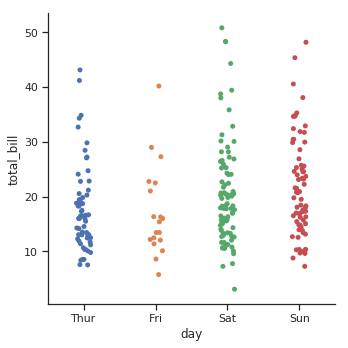

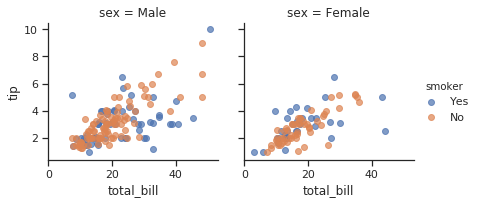

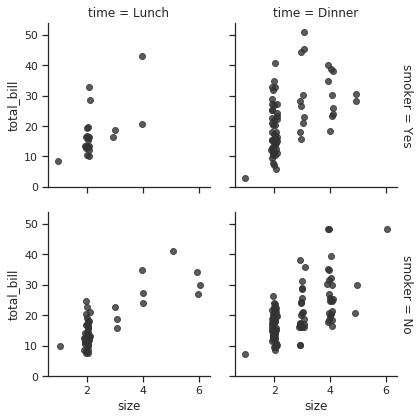

In [16]:
# Categorical scatterplots
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".2", fit_reg=False, x_jitter=.1);

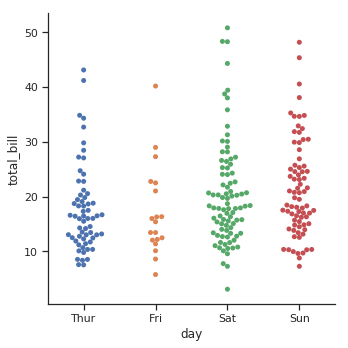

In [25]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

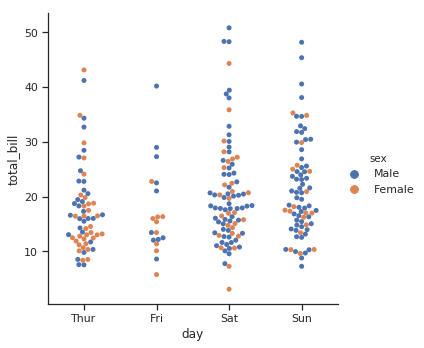

In [27]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips); 

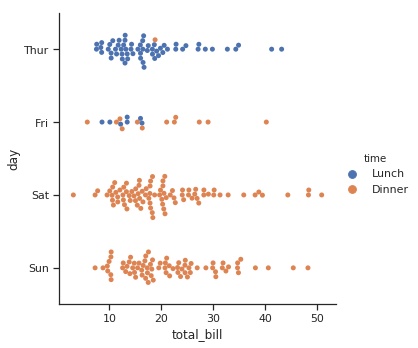

In [28]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

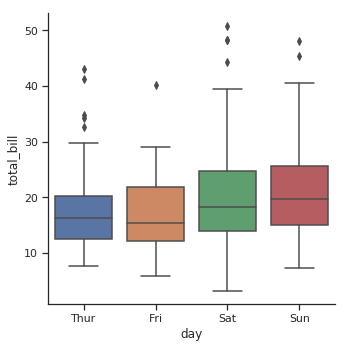

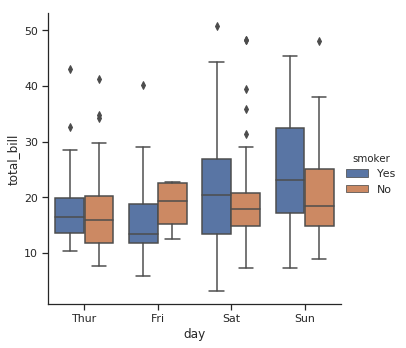

In [29]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

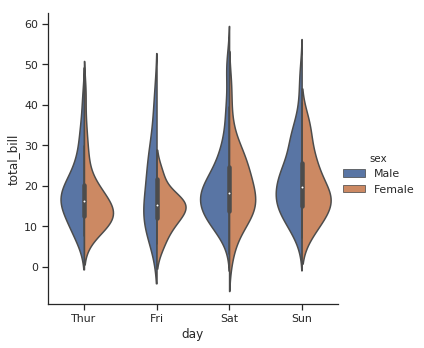

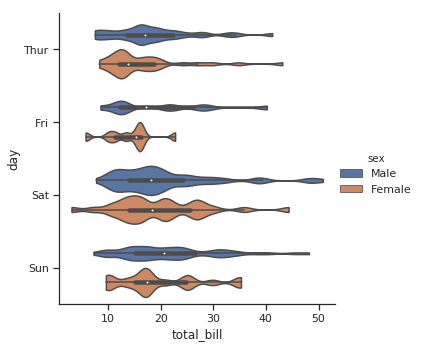

In [31]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips);

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


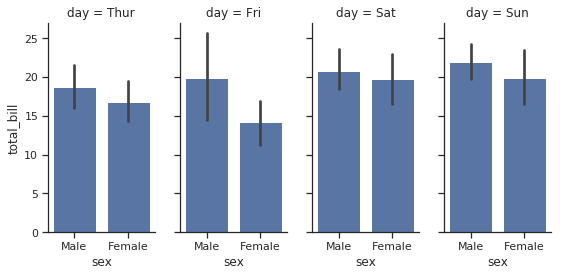

In [19]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

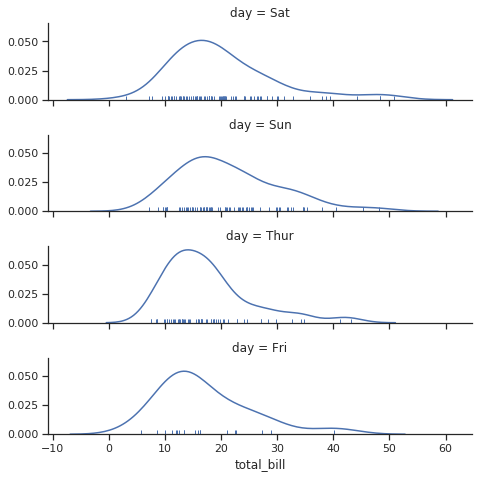

In [21]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

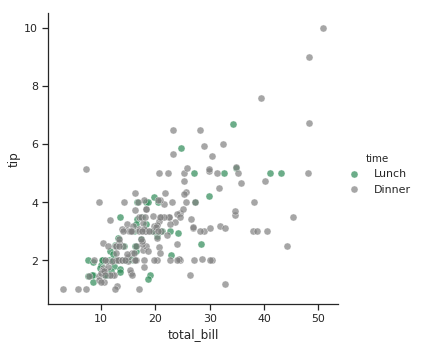

In [22]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

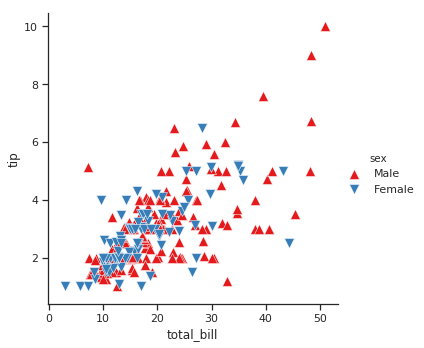

In [23]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", height=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

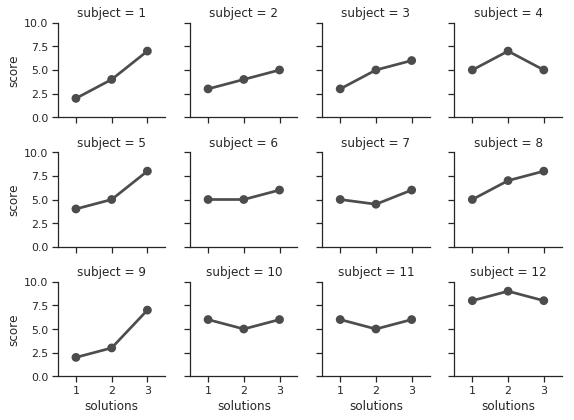

In [24]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", ci=None);